# Time-Series Forecasting – Stock Prices

## Fetch Dataset from Yahoo Finance 

In [1]:
import datetime
import yfinance as yf
start_date = datetime.datetime(2020, 10, 1)
end_date = datetime.datetime(2025, 9, 1)
meta = yf.Ticker("AAPL")
data = meta.history(start=start_date, end=end_date)

## Export data to CSV file

In [3]:
data.to_csv("../data/AAPL_stock_data.csv")
print("Data exported to ../data/AAPL_stock_data.csv")
print(f"File saved with {len(data)} rows and {len(data.columns)} columns")

Data exported to ../data/AAPL_stock_data.csv
File saved with 1234 rows and 7 columns


## Importing libreries 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Preprocessing

In [12]:
df = pd.read_csv("../data/AAPL_stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-10-01 00:00:00-04:00,114.430515,114.508334,112.669898,113.603706,116120400,0.0,0.0
1,2020-10-02 00:00:00-04:00,109.810111,112.222454,109.158392,109.936562,144712000,0.0,0.0
2,2020-10-05 00:00:00-04:00,110.802282,113.467526,110.452103,113.321617,106243800,0.0,0.0
3,2020-10-06 00:00:00-04:00,112.543451,112.951998,109.187577,110.072754,161498200,0.0,0.0
4,2020-10-07 00:00:00-04:00,111.492912,112.397540,111.016275,111.940361,96849000,0.0,0.0


In [ ]:
df = df.drop(['Dividends', 'Stock Splits'], axis=1)
# Convert to datetime and then extract just the date part
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.strftime('%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-10-01,114.430515,114.508334,112.669898,113.603706,116120400
1,2020-10-02,109.810111,112.222454,109.158392,109.936562,144712000
2,2020-10-05,110.802282,113.467526,110.452103,113.321617,106243800
3,2020-10-06,112.543451,112.951998,109.187577,110.072754,161498200
4,2020-10-07,111.492912,112.397540,111.016275,111.940361,96849000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1234 non-null   object 
 1   Open    1234 non-null   float64
 2   High    1234 non-null   float64
 3   Low     1234 non-null   float64
 4   Close   1234 non-null   float64
 5   Volume  1234 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 58.0+ KB


There is no missing value.

In [17]:
X = df.drop(['Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
print(X)
print(y)

            Date        Open        High         Low     Volume
0     2020-10-01  114.430515  114.508334  112.669898  116120400
1     2020-10-02  109.810111  112.222454  109.158392  144712000
2     2020-10-05  110.802282  113.467526  110.452103  106243800
3     2020-10-06  112.543451  112.951998  109.187577  161498200
4     2020-10-07  111.492912  112.397540  111.016275   96849000
...          ...         ...         ...         ...        ...
1229  2025-08-25  226.479996  229.300003  226.229996   30983100
1230  2025-08-26  226.869995  229.490005  224.690002   54575100
1231  2025-08-27  228.610001  230.899994  228.259995   31259500
1232  2025-08-28  230.820007  233.410004  229.339996   38074700
1233  2025-08-29  232.509995  233.380005  231.369995   39418400

[1234 rows x 5 columns]
0       113.603706
1       109.936562
2       113.321617
3       110.072754
4       111.940361
           ...    
1229    227.160004
1230    229.309998
1231    230.490005
1232    232.559998
1233    232.13999

In [19]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

            Date        Open        High         Low    Volume
869   2024-03-18  174.318200  176.442941  172.282813  75604200
728   2023-08-24  178.917509  179.343346  174.302707  54945800
803   2023-12-11  191.488808  191.865622  189.812993  60943700
644   2023-04-25  163.141386  164.247492  161.699486  48714100
813   2023-12-26  191.984602  192.262250  191.211152  28919300
...          ...         ...         ...         ...       ...
1044  2024-11-25  230.641249  232.424910  228.927332  90152800
1095  2025-02-11  227.642796  234.655630  227.572975  53718400
1130  2025-04-02  220.779591  224.640136  220.480320  35905900
860   2024-03-05  169.542480  170.813352  168.410608  95132400
1126  2025-03-27  220.849406  224.440621  220.021431  37094800

[987 rows x 5 columns]
869     172.481384
728     174.669128
803     191.558212
644     161.738998
813     191.429306
           ...    
1044    232.046249
1095    232.052002
1130    223.343307
860     168.907043
1126    223.303406
Name: Close

## Visualize the trends 

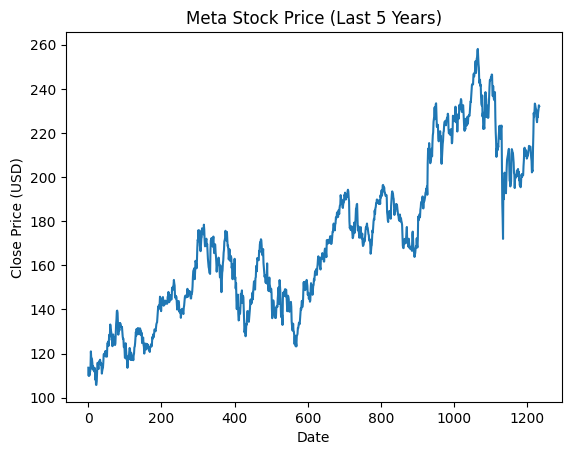

In [14]:
df['Close'].plot(title="Meta Stock Price (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()

Plot above shows that the price of the stock increases over time. 

## Model Implementation

### Traditional statistical model 